In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import needed libraries

## Happiness.csv

In [6]:
happiness_file = "./data/Happiness.csv"
happiness_df = pd.read_csv(happiness_file, header=0)
#load and profile data
print(happiness_df.head())
print(happiness_df.tail())
print(happiness_df.shape)

  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559  

In [7]:
print(happiness_df.duplicated().sum())
# check for duplicates

0


In [8]:
print(happiness_df.columns)
# verify column names

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


## world-happiness-report.csv

In [9]:
world_happiness_file = "./data/world-happiness-report.csv"
world_happiness_df = pd.read_csv(world_happiness_file, header=0)
#load and profile data
print(world_happiness_df.head())
print(world_happiness_df.tail())
print(world_happiness_df.shape)

  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0        

In [10]:
print(world_happiness_df.duplicated().sum())
# check for duplicate and null values
print(world_happiness_df.isnull().values.any())
print(world_happiness_df.isnull().values.sum())

0
True
373


In [11]:
print(world_happiness_df.columns)
# verify columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')


## world-happiness-report-2021.csv

In [12]:
world_happiness2021_file = "./data/world-happiness-report-2021.csv"
world_happiness2021_df = pd.read_csv(world_happiness2021_file, header=0)
# load and profile data
print(world_happiness2021_df.head())
print(world_happiness2021_df.tail())
print(world_happiness2021_df.shape)

  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878  

In [13]:
print(world_happiness2021_df.duplicated().sum())
# check for duplicates and null values
print(world_happiness2021_df.isnull().values.any())
print(world_happiness2021_df.isnull().values.sum())

0
False
0


In [14]:
print(world_happiness2021_df.columns)
# verify columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


## countries_quality_of_life_index.18-10-2021.csv

In [15]:
quality_index_file = "./data/countries_quality_of_life_index.18-10-2021.csv"
quality_index_df = pd.read_csv(quality_index_file, header=0)
# load and profile data
print(quality_index_df.head())
print(quality_index_df.tail())
print(quality_index_df.shape)

      Name         "NativeName"   "QualityOfLifeIndex"
0   Canada             "Canada"             159.511902
1    Japan                 "日本"             165.326905
2   Norway   "Kongeriket Norge"             173.158166
3  Ireland               "Eire"             153.182191
4  Hungary       "Magyarorszag"             135.343937
                           Name                    "NativeName"  \
110               Cote d'Ivoire   "Republique de Cote d'Ivoire"   
111                     Morocco                        "المغرب"   
112                     Nigeria                      "Nijeriya"   
113  Kingdom of the Netherlands    "Koninkrijk der Nederlanden"   
114                Danish Realm            "Kongeriget Danmark"   

      "QualityOfLifeIndex"  
110              24.341801  
111             106.065829  
112              53.089911  
113             182.535902  
114             188.635667  
(115, 3)


In [16]:
print(quality_index_df.duplicated().sum())
# check for duplicates and null values
print(quality_index_df.isnull().values.any())
print(quality_index_df.isnull().values.sum())

0
False
0


In [17]:
print(quality_index_df.columns)
# verify columns

Index(['Name', ' "NativeName"', ' "QualityOfLifeIndex"'], dtype='object')


## Quality of life in a country comparison.csv

In [18]:
quality_country_file = "./data/Quality of life in a country comparison.csv"
quality_country_df = pd.read_csv(quality_country_file, header=0)
# load and profile data
print(quality_country_df.head())
print(quality_country_df.tail())
print(quality_country_df.shape)

   Unnamed: 0  Rank      Country  Stability(15%)  Rights(20%)  Health(15%)  \
0           0     1    Australia              86           92           87   
1           1     2   San Marino              81           82           91   
2           2     3    Hong Kong              77           85          100   
3           3     4  Switzerland              91           99           93   
4           4     5        Macao              90           71          100   

   Safety(10%)  Climate(15%)  Costs(15%)  Popularity(10%)  \
0          100            90          23               41   
1           87            62          61               47   
2           97            49          61               41   
3           99            34          44               46   
4           93            48          61               44   

   TotalQuality of life(100%)  
0                          76  
1                          74  
2                          74  
3                          74  
4   

In [19]:
print(quality_country_df.duplicated().sum())
# check for duplicates and null values
print(quality_country_df.isnull().values.any())
print(quality_country_df.isnull().values.sum())

0
False
0


In [20]:
print(quality_country_df.columns)
# verify columns

Index(['Unnamed: 0', 'Rank', 'Country', 'Stability(15%)', 'Rights(20%)',
       'Health(15%)', 'Safety(10%)', 'Climate(15%)', 'Costs(15%)',
       'Popularity(10%)', 'TotalQuality of life(100%)'],
      dtype='object')


In [21]:
happiness_world2021 = pd.merge(happiness_df, world_happiness2021_df, on='Country name', how='left')
# merge data frames left outer merge to help compare differences to make priority values
# print(happiness_world2021.head())
print(happiness_world2021.tail())
print(happiness_world2021.shape)
# print(happiness_world2021.columns)
# profile merged data frame

                 Country name Regional indicator_x  Ladder score_x  \
148  Central African Republic   Sub-Saharan Africa          3.4759   
149                    Rwanda   Sub-Saharan Africa          3.3123   
150                  Zimbabwe   Sub-Saharan Africa          3.2992   
151               South Sudan   Sub-Saharan Africa          2.8166   
152               Afghanistan           South Asia          2.5669   

     Standard error of ladder score_x  upperwhisker_x  lowerwhisker_x  \
148                          0.115183        3.701658        3.250141   
149                          0.052425        3.415053        3.209547   
150                          0.058674        3.414202        3.184198   
151                          0.107610        3.027516        2.605684   
152                          0.031311        2.628270        2.505530   

     Logged GDP per capita_x  Social support_x  Healthy life expectancy_x  \
148                 6.625160          0.319460                 

In [22]:
print(happiness_world2021.columns)
# verify columns after merge

Index(['Country name', 'Regional indicator_x', 'Ladder score_x',
       'Standard error of ladder score_x', 'upperwhisker_x', 'lowerwhisker_x',
       'Logged GDP per capita_x', 'Social support_x',
       'Healthy life expectancy_x', 'Freedom to make life choices_x',
       'Generosity_x', 'Perceptions of corruption_x',
       'Ladder score in Dystopia_x', 'Explained by: Log GDP per capita_x',
       'Explained by: Social support_x',
       'Explained by: Healthy life expectancy_x',
       'Explained by: Freedom to make life choices_x',
       'Explained by: Generosity_x',
       'Explained by: Perceptions of corruption_x', 'Dystopia + residual_x',
       'Regional indicator_y', 'Ladder score_y',
       'Standard error of ladder score_y', 'upperwhisker_y', 'lowerwhisker_y',
       'Logged GDP per capita_y', 'Social support_y',
       'Healthy life expectancy_y', 'Freedom to make life choices_y',
       'Generosity_y', 'Perceptions of corruption_y',
       'Ladder score in Dystopia_y', 

In [26]:

happiness_world2021.drop([col for col in happiness_world2021.columns if '_y' in col],axis=1,inplace=True)
# drop "_y" columns because "_x" more up to date
drop_cols = ['Regional indicator_x', 'Standard error of ladder score_x', 'upperwhisker_x', 'lowerwhisker_x', 'Ladder score in Dystopia_x', 'Explained by: Log GDP per capita_x', 'Explained by: Social support_x', 'Explained by: Healthy life expectancy_x', 'Explained by: Freedom to make life choices_x', 'Explained by: Generosity_x', 'Explained by: Perceptions of corruption_x', 'Dystopia + residual_x' ]
happiness_world2021.drop(drop_cols, inplace=True, axis=1)
# drop columns that are not applicable
print(happiness_world2021.shape)
print(happiness_world2021.columns)
# profile data for verification

(153, 8)
Index(['Country name', 'Ladder score_x', 'Logged GDP per capita_x',
       'Social support_x', 'Healthy life expectancy_x',
       'Freedom to make life choices_x', 'Generosity_x',
       'Perceptions of corruption_x'],
      dtype='object')


In [29]:
happiness_world2021.columns = happiness_world2021.columns.str.rstrip('_x')
# clean up column names
print(happiness_world2021.isnull().values.any())
print(happiness_world2021.isnull().values.sum())
# check for null values
print(happiness_world2021.head())


False
0
  Country name  Ladder score  Logged GDP per capita  Social support  \
0      Finland        7.8087              10.639267        0.954330   
1      Denmark        7.6456              10.774001        0.955991   
2  Switzerland        7.5599              10.979933        0.942847   
3      Iceland        7.5045              10.772559        0.974670   
4       Norway        7.4880              11.087804        0.952487   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                71.900825                      0.949172   -0.059482   
1                72.402504                      0.951444    0.066202   
2                74.102448                      0.921337    0.105911   
3                73.000000                      0.948892    0.246944   
4                73.200783                      0.955750    0.134533   

   Perceptions of corruption  
0                   0.195445  
1                   0.168489  
2                   0.303728  
3       

In [33]:
print(happiness_world2021.isnull().sum())

Country name                    0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [40]:
pd.set_option('precision', 2)
# round all values to 2 decimal points
print(happiness_world2021.head())

  Country name  Ladder score  Logged GDP per capita  Social support  \
0      Finland          7.81                  10.64            0.95   
1      Denmark          7.65                  10.77            0.96   
2  Switzerland          7.56                  10.98            0.94   
3      Iceland          7.50                  10.77            0.97   
4       Norway          7.49                  11.09            0.95   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     71.9                          0.95       -0.06   
1                     72.4                          0.95        0.07   
2                     74.1                          0.92        0.11   
3                     73.0                          0.95        0.25   
4                     73.2                          0.96        0.13   

   Perceptions of corruption  
0                       0.20  
1                       0.17  
2                       0.30  
3               

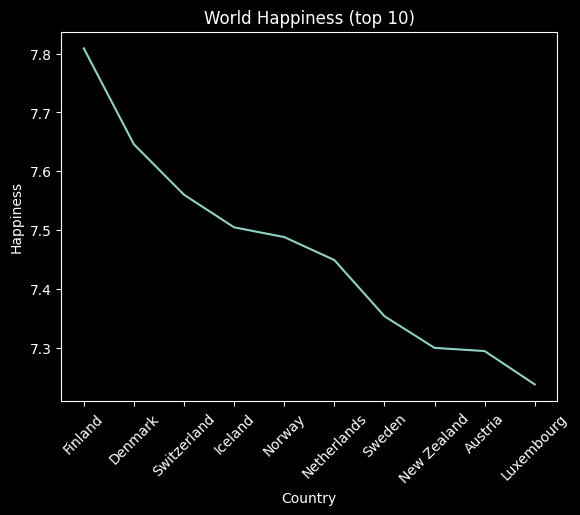

In [49]:
#visualization ladder score line chart
plt.style.use('dark_background')

# 1st arg is column for x-axis, 2nd arg is column for y-axis
plt.plot(happiness_world2021['Country name'][:10], happiness_world2021['Ladder score'][:10])

# give the chart a title
plt.title("World Happiness (top 10)")

# label the x and y axes
plt.xlabel('Country')
plt.ylabel('Happiness')
plt.xticks(rotation= 45)



# show the chart
plt.show()


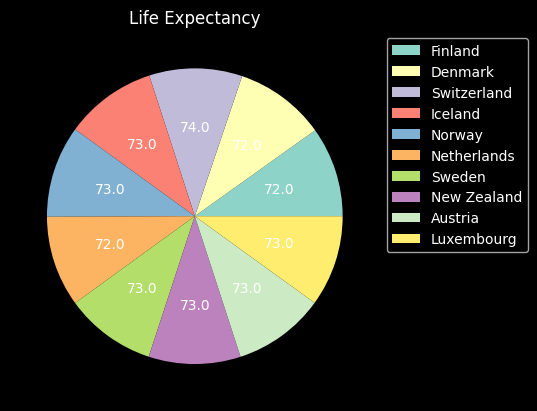

In [76]:
# visualization pie chart life expectancy

y = happiness_world2021['Healthy life expectancy'][:10]
country_labels = happiness_world2021['Country name'][:10]

def absolute_value(val):
    """take value and present it as absolute to show age instead of percentage

Args:
        value

Returns:
        absolute number
    """
    a  = np.round(val/100.*y.sum(), 0)
    return a

plt.title('Life Expectancy')
plt.pie(y, autopct = absolute_value)
plt.legend(country_labels, bbox_to_anchor=(1,1), loc= 'best')
plt.show() 